In [1]:
#from jet_ML_tools import *
from data_import import data_import
import generate

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [4]:
def pixelate(jet, img_size = 33, jet_R = 0.4, nb_chan = 1):

    """ A function for creating a jet image from a list of particles.

    jet: an array containing the list of particles in a jet with each row 
         representing a particle and the columns being (rapidity, phi, pT, 
         pdgid), the latter not being necessary for a grayscale image.
    jet_phi: phi value for the jet. used to avoid split iamges.
    img_size: number of pixels along one dimension of the image.
    jet_R: R value used when finding the jet. The image will be size 2R x 2R
           in (y,phi) space.
    nb_chan: 1 - returns a grayscale image of total pt
             2 - returns a two-channel image with total pt and charge counts
             3 - returns a three-channel "RGB" image with charged pt, neutral
                 pt, and charge counts.
    """

    if nb_chan not in [1,2,3]:
        raise ValueError('Invalid number of channels for jet image.')

    # assume that the image should be (2jet_R x 2jet_R) in size
    pix_width = 2 * jet_R / img_size
    jet_image = np.zeros((nb_chan, img_size, img_size))

    raps = jet[:,0]
    phis = jet[:,1]
    pts  = jet[:,2]

    # deal with split images
    ref_phi = phis[np.argmax(pts)]
    phis[phis - ref_phi >  2 * jet_R] -= 2 * np.pi
    phis[phis - ref_phi < -2 * jet_R] += 2 * np.pi 

    # get jet pt centroid index
    rap_avg = np.average(raps, weights = pts)
    phi_avg = np.average(phis, weights = pts)
    rap_pt_cent_index = np.ceil(rap_avg/pix_width - .5) - np.floor(img_size / 2)
    phi_pt_cent_index = np.ceil(phi_avg/pix_width - .5) - np.floor(img_size / 2)
    
    # center image and transition to indices
    rap_indices = np.ceil(raps/pix_width - .5) - rap_pt_cent_index
    phi_indices = np.ceil(phis/pix_width - .5) - phi_pt_cent_index

    # delete elements outside of range
    mask = np.ones(raps.shape).astype(bool)
    mask[rap_indices < 0] = False
    mask[phi_indices < 0] = False
    mask[rap_indices >= img_size] = False
    mask[phi_indices >= img_size] = False
    rap_indices = rap_indices[mask].astype(int)
    phi_indices = phi_indices[mask].astype(int)

    # construct grayscale image
    if nb_chan == 1:
        for i,(ph,y,pt) in enumerate(zip(phi_indices, rap_indices, pts[mask])):
            jet_image[0, ph, y] += pt
        num_pt_chans = 1

    # construct two-channel image
    elif nb_chan == 2:
        for ph,y,pt,label in zip(phi_indices, rap_indices, 
                                 pts[mask], jet[mask,3]):
            jet_image[0, ph, y] += pt
            if charge_map[label] != 0:
                jet_image[1, ph, y] += 1
        num_pt_chans = 1

    # construct three-channel image
    elif nb_chan == 3:
        for ph,y,pt,label in zip(phi_indices, rap_indices, 
                                 pts[mask], jet[mask,3]):
            if charge_map[label] == 0:
                jet_image[1, ph, y] += pt
            else:
                jet_image[0, ph, y] += pt
                jet_image[2, ph, y] += 1
        num_pt_chans = 2

    # L1-normalize the pt channels of the jet image
    try:
        jet_image[:num_pt_chans] = jet_image[:num_pt_chans]/\
                                   np.sum(jet_image[:num_pt_chans])
    except FloatingPointError:
        sys.stderr.write('ERROR: No particles in image!\n')
        sys.stderr.flush()

    return jet_image

In [6]:
# import data from file 
jets, jet_avgs = data_import('event', [1])

    
jet_images = np.asarray(jet_images)

# make jet images
jet_images = np.asarray([pixelate(jet) for jet in jets])

jet_images_from_file = data_import('jetimage', [1])

#old_jet_images = np.asarray([old_pixelate(jet, avg, 33, .4) for jet, avg in zip(jets, jet_avgs)])

#eric_jet_images = np.asarray([eric_pixelate(jet, avg, 33, .4) for jet, avg in zip(jets, jet_avgs)])

1.06517304346e-12 81


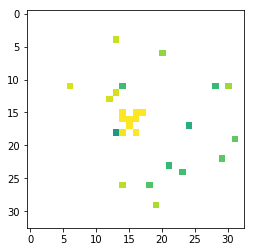

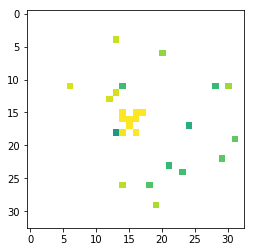

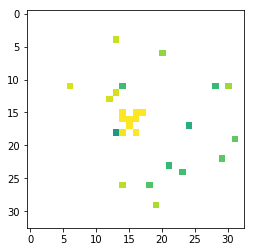

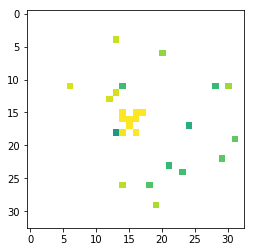

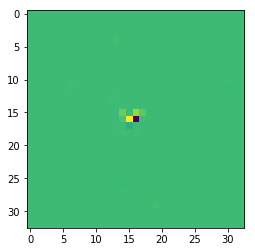

4.30933067008e-13


In [8]:
set1_vals = jet_images_from_file
set2_vals = jet_images

set1 = set1_vals
set2 = set2_vals

norm_diffs = [np.linalg.norm(set1[i][0] - set2[i][0].T) for i in range(100)]
worst = np.argmax(norm_diffs)
worst_val = np.max(norm_diffs)
print(worst_val, worst)

plt.imshow(set1[worst][0], norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

plt.imshow(set2[worst][0].T, norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

plt.imshow(set1_vals[worst][0], norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

plt.imshow(set2_vals[worst][0].T, norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

plt.imshow(set1[worst][0]-set2[worst][0].T)
plt.show()
print(np.max(set1_vals[worst][0]-set2_vals[worst][0].T))

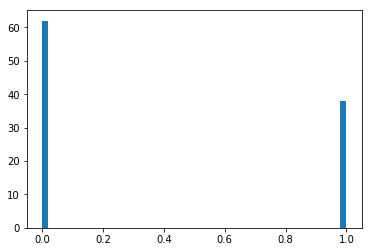

In [12]:
plt.hist(norm_diffs, bins = 50)
plt.show()

In [14]:
np.argsort(norm_diffs)

array([304, 238, 306, 677, 150, 960, 593, 310, 674, 248, 427, 179, 938,
       420, 535, 581, 509,  95, 485, 290, 389, 886, 950,  30, 642, 153,
       109, 324, 860, 198, 826, 955, 123, 989, 892, 396, 579, 521,  24,
       154,  88, 736,  51, 126, 475,  64, 909, 869, 534, 321,  83, 774,
       102, 876, 128,  58, 998, 386,   5, 623, 671, 222, 385, 705, 991,
       883, 726, 368, 837, 976, 286,  89, 473, 927, 825, 419, 398, 785,
        37, 196, 361, 497, 513, 649, 543, 549, 916,  27,  50, 840, 134,
        18, 852, 771, 359, 711,  69, 590, 158,  63, 300, 783, 145, 716,
       216, 480, 219, 690, 823, 136, 622, 613, 190, 538, 633, 753, 244,
       184, 727, 882, 858, 425, 111, 971, 983, 864, 493,  15,  79, 970,
       205, 370, 392, 554, 515, 568, 355, 847, 564, 728, 165,  72, 757,
       917, 702, 947, 204, 541, 691, 266, 607, 661, 647,   6, 426, 801,
       250, 104, 835, 822, 100, 144, 130, 352, 880,  80, 411, 471, 409,
       278, 940,   4, 650, 948, 202,  74, 254, 836, 963, 628, 12

In [29]:
x=[14,  53,  47, 330, 368, 248, 219,  72, 142, 216, 277, 300, 107,
       304, 105, 101, 367,  78, 309, 121, 124,  64, 244,  85, 217,   1,
        92, 199, 247,   0, 158, 218,  23, 377, 359, 241, 139,  11, 129,
       238, 191,  43,  28, 116, 226, 242, 132, 310, 345, 115,  41, 293,
       225, 361, 332, 246, 263,  88,  31, 334, 201, 296, 197, 265,  10,
        24, 298, 259,  33, 369, 325,   5,  68,  20, 192, 233,  58, 258,
        37,   7, 282, 372,  99,  30, 347, 305, 173, 203, 137,  35, 150,
       147,  12, 207, 102, 178,  65, 162, 117,  79, 168, 104, 183, 254,
       299,   4,  19, 136, 253, 290, 113, 171, 227, 274, 328, 379, 323,
         2, 179, 351,  29, 371, 112, 286, 182,  48, 193, 151, 155, 153,
        82, 118, 232, 146, 128,  50,  77, 315, 363,  52,  45, 245, 275,
       134, 338, 180, 223,  39, 131, 222, 110, 156, 370, 205,  74, 352,
       200, 206, 354, 318, 256,  70, 208, 273, 358, 344, 237,  90, 194,
       229,  61, 213, 215, 181, 123, 268, 289, 109,  95, 127, 249, 348,
       204,   8, 141,  98, 326, 350, 285,   6,   9, 165, 329,  36, 340,
        46, 157, 114, 187, 381, 120, 308, 255,  76, 267, 279, 211, 311,
       317, 202, 196, 316, 159, 320, 198, 374, 360, 111, 169,  93, 251,
       177, 373,  17, 188, 228, 185, 224, 221, 270, 122, 257, 333, 380,
        62, 184, 239, 339,  13, 271,  89, 209, 306, 376,  73, 240, 166,
        22, 269, 210, 364,  67,  27, 164,  15, 103,  81, 154,  87, 366,
       138, 190, 322, 160, 294, 195, 163,  80, 144, 287, 321, 119,  42,
       319, 307,   3,  97,  25, 266, 280, 126, 378,  60, 230,  21,  59,
        16,  75, 312, 357, 272, 342, 236, 234,  18, 314, 375, 149, 335,
       125, 212, 349, 324,  32, 291, 288, 167,  84, 220, 276, 175, 292,
       189,  66, 261, 235,  40, 143, 331,  57,  38, 284, 356,  83, 135,
       353, 231, 106, 152, 174,  69, 100,  55,  86, 130,  49, 343, 327,
       313,  56, 337, 297, 176,  71,  34, 145, 341, 264,  63, 133, 108,
       336, 172, 260, 303, 140, 346, 243, 170, 214, 362, 302, 148, 186,
        44,  96, 281, 252,  94, 262, 295,  91, 355,  26, 283,  51, 301,
       250, 365,  54, 161, 278]
len(x)

382

In [38]:
np.argsort(norm_diffs)

array([304, 150, 539, 750, 979, 277, 423, 536, 481, 951, 418, 134, 793,
        47, 832, 266, 645, 587,  89, 520, 891, 579, 886, 660, 877, 439,
       658, 313, 919, 934, 235, 866, 628, 935, 123, 563, 974, 807,  45,
       168, 740, 385, 565, 500, 694, 712, 790, 770, 663, 797, 335, 184,
       910, 270,  51, 963, 732, 846, 590, 785, 512, 557, 982, 120, 700,
       945, 607, 411, 547, 546, 327, 751, 396, 255, 156, 111, 401, 813,
       994,  69, 251, 461,   3, 337, 812, 699, 384, 608, 144, 382, 159,
       441, 601, 618, 158, 395, 730, 859, 687, 978,  44, 139, 326, 475,
       901, 917, 862, 648, 599, 705, 240, 990, 786, 394, 102, 688, 253,
       462, 108, 661,  88, 617, 515, 217, 196, 250,   6, 200, 612,   5,
       756, 100, 650, 286, 105, 880, 966, 203, 487, 981, 357, 844,  84,
       300,  52, 627, 988, 501,  66,  18, 826, 561, 692, 145, 940, 922,
       907, 631, 767, 647, 259, 762, 960, 341, 124, 474, 511, 918, 130,
       460, 941, 198, 973,  13, 670, 179, 674, 226,  32, 421, 60

[ 0.84092378  0.84307722  0.84915638  0.84952005  0.85490389  0.85713526
  0.85896144  0.86486528  0.8688742   0.86968117  0.86989837  0.87047393
  0.88724246  0.88760517  0.89170973  0.89468929  0.90031537  0.90246293
  0.90872277  0.97293574  0.9790395   1.0380044   1.07777636  1.08466997
  1.10001239]


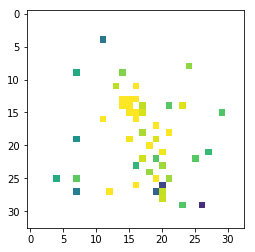

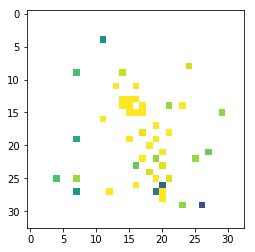

In [40]:
sorted_diffs = np.sort(norm_diffs)

print(sorted_diffs[-25:])
worst = np.argsort(norm_diffs)[382]

plt.imshow(set1[worst][0], norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

plt.imshow(set2[worst][0].T, norm = mpl.colors.LogNorm(.00001, .01))
plt.show()

In [24]:
jet_images_from_new_file = np.load('../../../VAE/autoencoder-jets/src/gluon-jetimage-seed1.npz')['arr_0']

In [25]:
x = jet_images_from_new_file[:,0]
print(x.shape)
print(jet_images_from_file[:,0].shape)
np.linalg.norm(jet_images_from_new_file[:,0] - jet_images_from_file[:1000,0])

(1000, 33, 33)
(20000, 33, 33)


12.593194239945129

In [17]:
from data_import import recompress_npz_files
from os import listdir

In [18]:
path = '/Volumes/PTK_seagate/Data/AEJ/2-9-images/'
files = listdir(path)
for filename in files:
    if '50.npz' not in filename:
        continue
    images = np.load(join(path,filename))['arr_0']
    write_images_to_file(filename[:-4], images, path = path, addendum = '')

Writing images for gluon-jetimage-seed50 to file ... Done, in 1.783 seconds.
Writing images for quark-jetimage-seed50 to file ... Done, in 1.891 seconds.
